In [2]:
library(limma)
library(reshape2)
library(gridExtra)

source("../../evaluation_utils/plots/eda_plots.R")
source("../../evaluation_utils/filtering/filtering_normalization.R")
source("../../evaluation_utils/evaluation/DE_analysis.R")
source("../../evaluation_utils/plots/DE_plots.R")

source("../../evaluation_utils/simulation/simulation_func.R")

Warning message:
“package ‘reshape2’ was built under R version 4.2.3”
Warning message:
“package ‘gridExtra’ was built under R version 4.2.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.2.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.2”
Warning message:
“package ‘readr’ was built under R version 4.2.2”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.2”
Warning message:
“package ‘lubridate’ was built under R version 4.2.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3

# settings

In [3]:
check_dirs <- function(workdir){
    if (!dir.exists(workdir)){
        dir.create(workdir,recursive = TRUE)
    }
}

In [4]:
data_directory <- "/home/yuliya/repos/cosybio/FedProt/data/simulated_data/"
workdir <- "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

number_of_runs = 50

# Central and labs separately analysis

Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Filtering out features that have NAs in all columns
	Before filtering: 6000 600 
	After filtering: 6000 600 
Filtering by condition - two not-NA per condition
	Before filtering: 6000 600 
	After filtering: 6000 600 
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Filtering out features that have NAs in all columns
	Before filtering: 6000 600 
	After filtering: 6000 600 
Filtering 

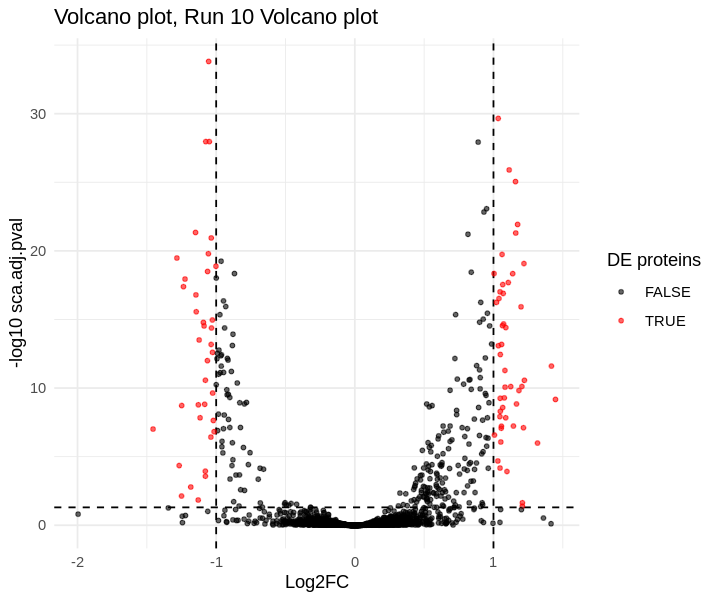

Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Filtering out features that have NAs in all columns
	Before filtering: 6000 600 
	After filtering: 6000 600 
Filtering by condition - two not-NA per condition
	Before filtering: 6000 600 
	After filtering: 6000 600 
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Filtering out features that have NAs in all columns
	Before filtering: 6000 600 
	After filtering: 6000 600 
Filtering 

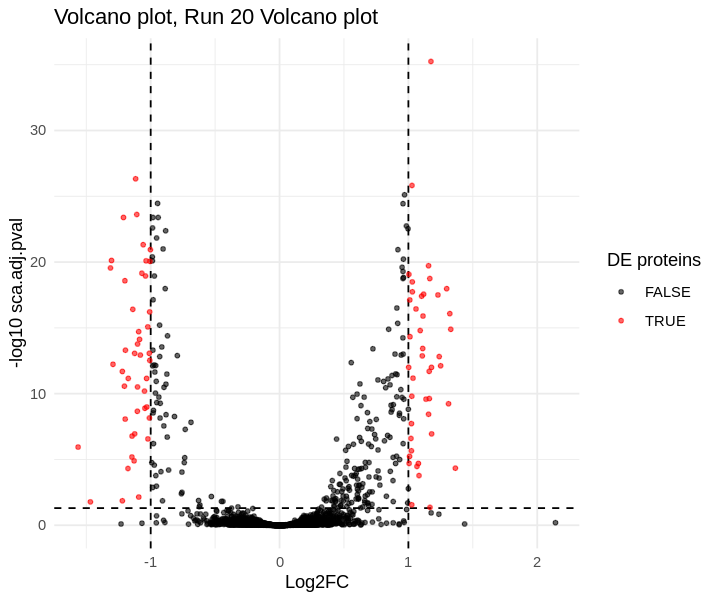

Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Filtering out features that have NAs in all columns
	Before filtering: 6000 600 
	After filtering: 6000 600 
Filtering by condition - two not-NA per condition
	Before filtering: 6000 600 
	After filtering: 6000 600 
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Count information is not available
Using P.Value and adj.P.Val as sca.P.Value and sca.adj.pval
Filtering out features that have NAs in all columns
	Before filtering: 6000 600 
	After filtering: 6000 600 
Filtering 

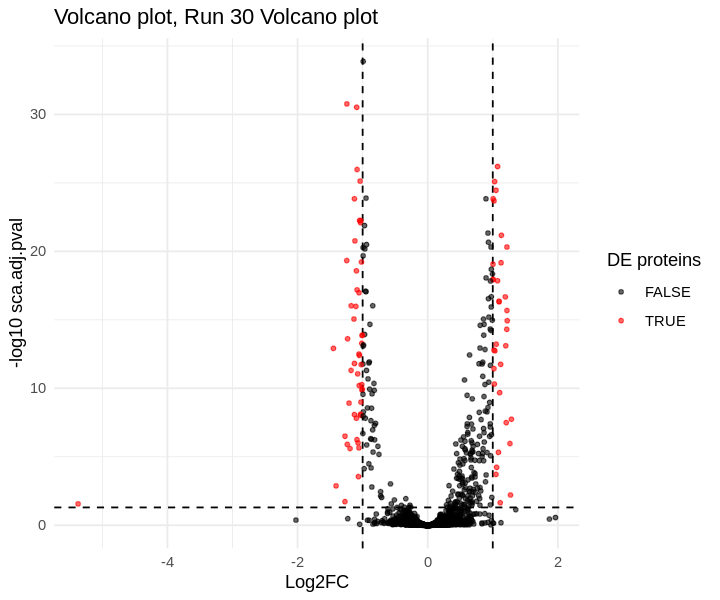

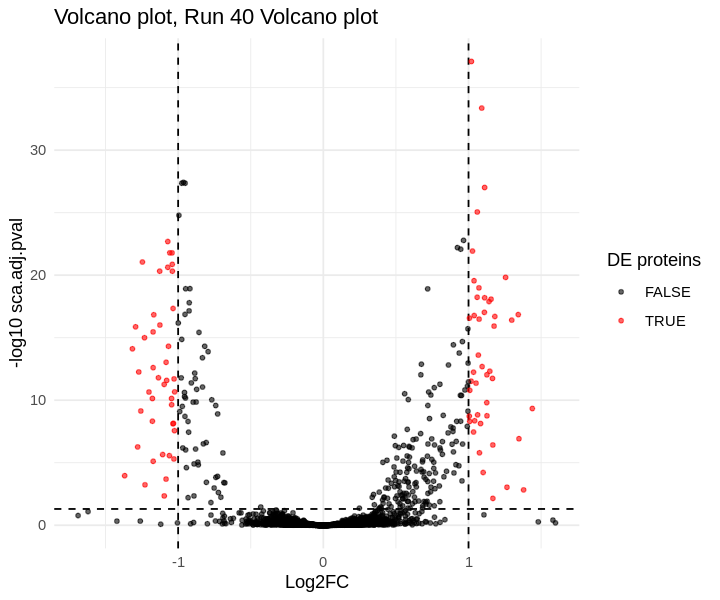

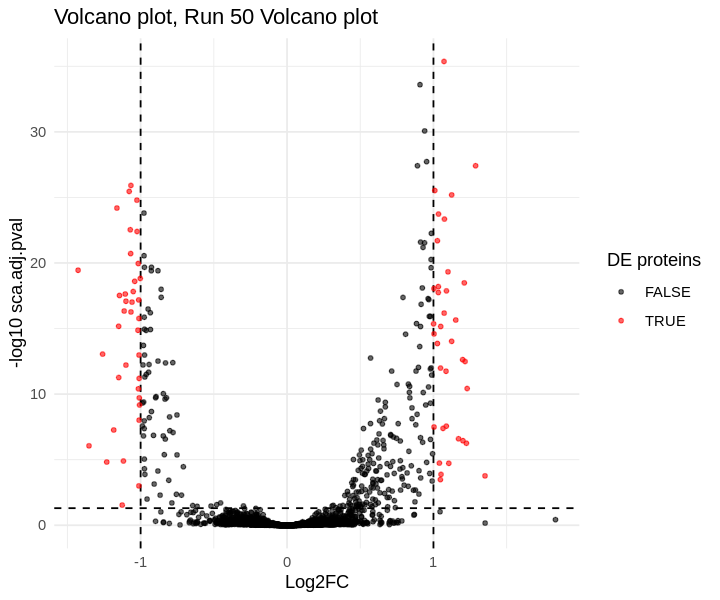

In [4]:
for (mode in c("mild_imbalanced")){ #"balanced", "imbalanced", 
    sub_path = mode

    generated_data_directory <- paste0(data_directory, sub_path, "/data")
    meta_output_dir <- paste0(workdir, sub_path, "/meta/")
    de_output_dir <- paste0(workdir, sub_path, "/results")
    check_dirs(meta_output_dir)
    check_dirs(de_output_dir)

    # run DEqMS
    # read batch info
    batch_info <- read.table(paste0(generated_data_directory, "/batch_info.tsv"), sep = "\t", header = TRUE)
    batch_info <- batch_info %>%
        mutate(lab = as.factor(batch), condition = as.factor(condition))

    for(j in 1:number_of_runs){
        i = 1
        
        if(j %% 10 == 0){
            print(paste0("Run number ", j))
        }
        # read data
        lab1_data <- read.table(paste0(generated_data_directory, "/",  j, "_lab_1_intensities_data.tsv"), sep = "\t", header = TRUE, row.names = 1)
        lab2_data <- read.table(paste0(generated_data_directory, "/",  j, "_lab_2_intensities_data.tsv"), sep = "\t", header = TRUE, row.names = 1)
        lab3_data <- read.table(paste0(generated_data_directory, "/",  j, "_lab_3_intensities_data.tsv"), sep = "\t", header = TRUE, row.names = 1)

        # run DEqMS separately for each lab
        design <- model.matrix(~0 + batch_info$condition)
        colnames(design) <- levels(as.factor(batch_info$condition))
        rownames(design) <- batch_info$file

        # write design matrix for each lab
        write.table(design[batch_info[batch_info$batch == "batch1",]$file, ], 
                    paste0(generated_data_directory, "/",  j, "_lab_1_design.tsv"), sep = "\t")
        write.table(design[batch_info[batch_info$batch == "batch2",]$file, ],
                    paste0(generated_data_directory, "/",  j, "_lab_2_design.tsv"), sep = "\t")
        write.table(design[batch_info[batch_info$batch == "batch3",]$file, ],
                    paste0(generated_data_directory, "/",  j, "_lab_3_design.tsv"), sep = "\t")


        contrasts <- makeContrasts(A - B, levels = colnames(design))
        for(batch in 1:3){
            lab_data <- get(paste0("lab", batch, "_data"))
            lab_design <- design[batch_info[batch_info$batch == paste0("batch", batch),]$file, ]
            lab_contrasts <- makeContrasts(A - B, levels = colnames(lab_design))
            de_results <- run_DE(lab_data, NULL, lab_design, lab_contrasts)
            write.table(
                de_results, 
                paste0(meta_output_dir, "/", j, "_lab", batch, "_res.tsv"), sep = "\t")
        }

        # Run central analysis
        design <- model.matrix(~0 + batch_info$condition + batch_info$lab)
        colnames(design) <- c(levels(batch_info$condition), levels(batch_info$lab)[-1])
        rownames(design) <- batch_info$file

        lab1_data <- lab1_data[rownames(lab3_data),] 
        lab2_data <- lab2_data[rownames(lab3_data),]

        joined_data <- cbind(lab1_data, lab2_data, lab3_data) %>% as.data.frame()
        joined_data <- joined_data[,rownames(design)]

        joined_data <- filter_na_proteins(joined_data, batch_info, 'file')
        joined_data <- filter_by_condition(joined_data, batch_info, 
            'file', c('A', 'B'), 'condition')

        # run DEqMS for joined data    
        contrasts <- makeContrasts(A - B, levels = colnames(design))
        de_results <- run_DE(joined_data, NULL, design, contrasts)
        write.table(
            de_results, 
            paste0(de_output_dir, "/", j, "_res.tsv"), sep = "\t")
    
    if(j %% 10 == 0){
        # plot volcano plot
        plot_result <- volcano_plot(
            de_results, 
            title = paste0("Run ", j, " Volcano plot"), 
            pval_threshold = 0.05, logfc_threshold = 1,
            show_names = FALSE)
        ggsave(
            file = paste0(de_output_dir, "/", j, "_volcano_plot.jpg"), 
            plot = plot_result, width = 7, height = 5)

        options(repr.plot.width=6, repr.plot.height=5)
        print(plot_result)
        }
    }

}

# Meta-analysis

In [5]:
for (mode in c("mild_imbalanced")){ #"balanced", "imbalanced", 
  command <- paste(
    "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/run_meta_analysis.sh",
    workdir,
    mode,
    number_of_runs,
    sep = " "
  )
  system(command)
}

# FedProt

In [5]:
for (mode in c("mild_imbalanced")){ #"balanced", "imbalanced", 
  command <- paste(
    "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/run_fedprot.sh",
    data_directory,
    workdir,
    mode,
    number_of_runs,
    sep = " "
  )
  system(command)
}